#### 확률적 경사하강법 SGD
```
모델의 오차(비용) 를 최소화하는 파라미터(가중치)를 찾기위한 최적화 방법
현재위치 : 모델의 현재 파라미터
산의 높이 : 모델의 오차
기울기 : 반대방향으로 가야 가장 빠르게 낮아진다
```
```
배치경사 하강법 : 산 전체의 지형을 모두 조사해서 가장 가파른 방향을 찾아 한걸음씩 내려가는 구조
(한번에 전체 데이터를 다 쓴다)
장점 : 기울기 계산이 매우 정확
단점 : 데이터가 많으면 느리고 리소스를 많이 사용

확률적 경사하강법 : 무작위로 한 지점만 보고 그곳의 경사를 따라서 내려간다
SGD 는 무작위로 샘플 한개의 오차를 계산하고 파라미터를 업데이트 이 과정을 모든 데이터에 대해서 
빠르게 반복
무작위성의 장점 : 지역최저점(local minimum)에 갇히지 않고 더 낮은 전역 최저점(global minimum)
```

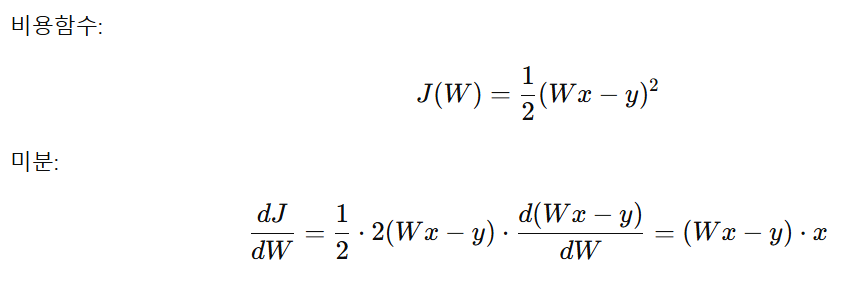

```
W-new : 새로운 가중치
W-old : 현재 가중치
n(네타) : 학습률 learning rate 너무 크면 최저점을 지나고 너무 작으면 학습이 매우 느려진다
나블라 : 기울기 Gradient
J : 오차함수(비용함수) 현재 가중치 W-old에서 하나의 데이터샘플에 대한 오차

새로운 가중치 = 현재가중치 오차를 키우는 기울기 방향과 반대로 학습률 만큼 이동한 값
```

미분 
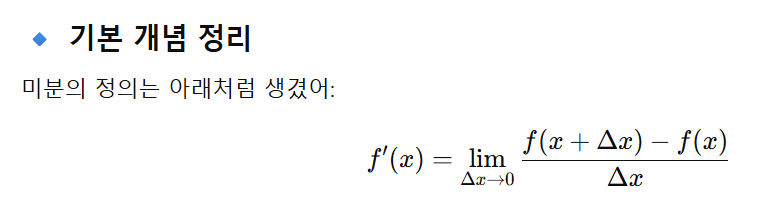
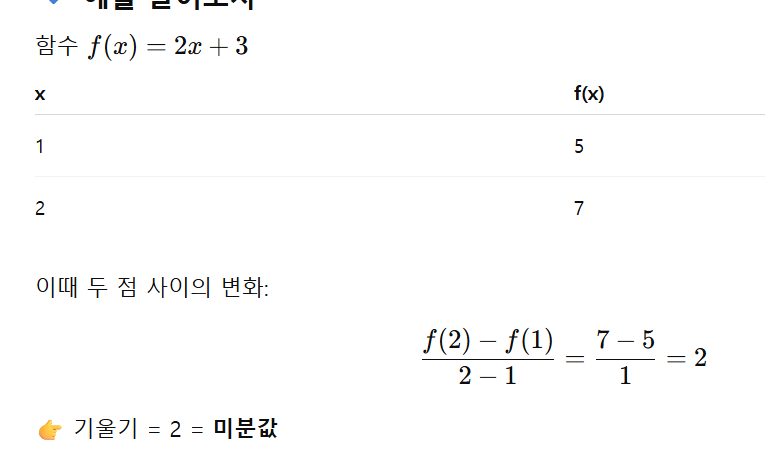

In [29]:
# y = Wx
# 비용함수 오차 (Wx - y)**2 / 2 수식을 미분 (Wx - y)*x 
# 공부시간 x 시험기간 y
# (3,7) W-old = 1.0 학습률 n = 0.1
# y-pred = 1.0 * 3
# 기울기 계산 (3.0 * 7) * 3 = -12.0
# 1.0 - (0.1 * -12.0) = 1.0 + 1.2 = 2.2

# (5,10)
# (11.0 - 10)*5 

epoch: 1 loss: 1.9879 w: 0.6196 b: 1.5125
epoch: 11 loss: 1.3010 w: 0.9570 b: 1.6912
epoch: 21 loss: 1.1944 w: 1.1072 b: 1.7067
epoch: 31 loss: 1.1603 w: 1.1975 b: 1.6883
epoch: 41 loss: 1.1428 w: 1.2282 b: 1.6135
epoch: 51 loss: 1.1248 w: 1.2762 b: 1.5689
epoch: 61 loss: 1.1062 w: 1.3358 b: 1.5270
epoch: 71 loss: 1.0946 w: 1.3739 b: 1.4900
epoch: 81 loss: 1.0838 w: 1.4124 b: 1.4532
epoch: 91 loss: 1.0764 w: 1.4464 b: 1.4289


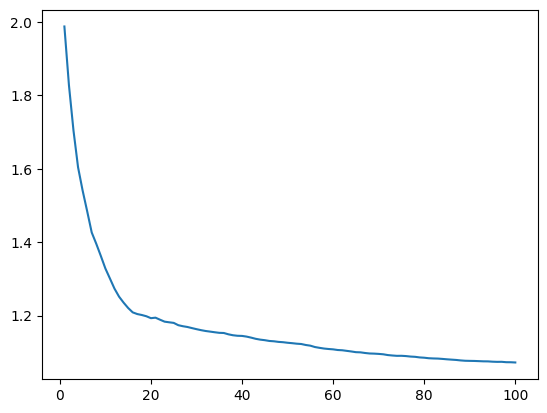

In [30]:
# epoch # 몇번 학습
import numpy as np
import matplotlib.pyplot as plt

# 샘플 데이터 2x + 1
X = 2*np.random.rand(100,1)
y = 2*X + 1 + np.random.randn(100,1) # 약간의 노이즈 추가

# SGD를 위한 초기값 셋팅
w = np.random.randn(1,1)  # 가중치(기울기)
b = np.random.randn(1,1)  # y 절편
learning_rate = 0.0005
n_epochs = 100
history = []  # 학습현황 기록
loss = []

# 학습 반복
for epoch in range(n_epochs):
    # epoch마다 데이터 샘플을 하나씩 학습
    for i in range(len(X)):
        random_idx = np.random.randint(len(X))
        xi = X[random_idx:random_idx + 1]
        yi = y[random_idx:random_idx + 1]
        # 예측 y-pred = Wx + b
        y_pred = xi.dot(w) + b

        # 오차 계산
        error = y_pred - yi

        # 수식적용 : 기울기 계산
        gradient_w = xi.T.dot(error)
        gradient_b = np.sum(error)

        # 수식적용 : 가중치 편향
        w = w - learning_rate * gradient_w
        b = b - learning_rate * gradient_b
        history.append( ( w.copy()[0,0], b.copy()[0,0] ) ) # 시각화를 위해

    # epoch 단위로 결과 출력
    total_loss = np.mean( (X.dot(w) + b - y) **2 )
    loss.append(total_loss)
    if epoch % 10 == 0:
        print(f'epoch: {epoch + 1} loss: {total_loss:.4f} w: {w[0,0]:.4f} b: {b[0,0]:.4f}')

plt.plot(range(1, n_epochs + 1), loss)


In [37]:
# SGD
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(X, y)

c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [38]:
sgd.predict(X)[:5], y[:5], sgd.intercept_, sgd.coef_

(array([2.57169205, 4.48777859, 3.7604167 , 3.31700517, 1.84499157]),
 array([[2.58520754],
        [4.50384988],
        [4.01973654],
        [1.40706502],
        [1.40440267]]),
 array([1.32614636]),
 array([1.66276673]))

In [ ]:
print(w, b)
predict = w*X + b
predict[:5]

In [ ]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


--- SGD 학습 시작 ---
Epoch  1 | Loss: 0.9538 | W: 1.4792, b: 1.8316
Epoch  2 | Loss: 0.8693 | W: 1.4159, b: 1.4113
Epoch  3 | Loss: 0.8347 | W: 1.6117, b: 1.2250
Epoch  4 | Loss: 0.8092 | W: 1.8373, b: 1.1190
Epoch  5 | Loss: 0.8202 | W: 1.7932, b: 1.0777
Epoch  6 | Loss: 0.8368 | W: 1.8656, b: 1.2897
Epoch  7 | Loss: 0.8171 | W: 1.8519, b: 1.0476
Epoch  8 | Loss: 0.8328 | W: 1.5885, b: 1.2651
Epoch  9 | Loss: 0.8323 | W: 1.6837, b: 1.4483
Epoch 10 | Loss: 0.8313 | W: 1.5510, b: 1.3325

--- SGD 학습 완료 ---
최종 W: 1.5510 (정답: 2.0)
최종 b: 1.3325 (정답: 1.0)


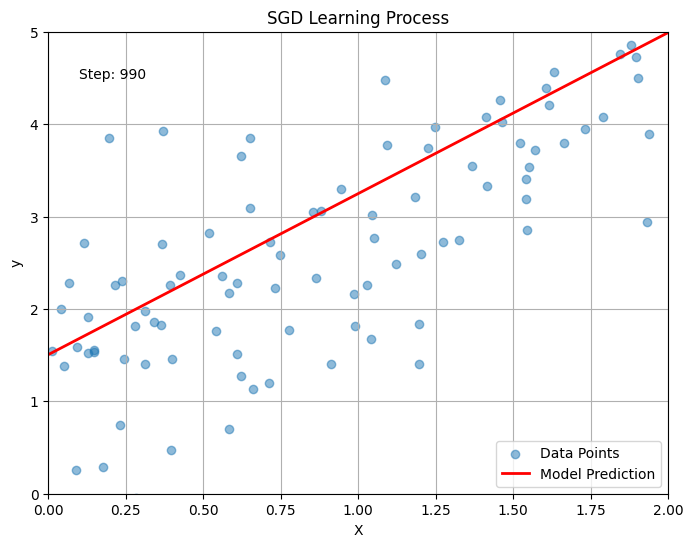

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 1. 샘플 데이터 생성 (정답: y = 2x + 1)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1) # 약간의 노이즈 추가

# 2. SGD 적용을 위한 초기값 설정
W = np.random.randn(1, 1) # 가중치 (기울기)
b = np.random.randn(1, 1) # 편향 (y절편)
learning_rate = 0.05
n_epochs = 10

# 학습 과정을 기록할 리스트
history = []

# 3. 정답을 찾아가는 과정 반복 묘사
print("--- SGD 학습 시작 ---")
for epoch in range(n_epochs):
    # 매 Epoch마다 데이터 샘플 하나씩 학습
    for i in range(len(X)):
        # 랜덤하게 하나의 샘플 선택
        random_index = np.random.randint(len(X))
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # 예측 (y_pred = W*x + b)
        y_pred = xi.dot(W) + b

        # 오차 계산
        error = y_pred - yi

        # 수식 적용: 기울기 계산
        gradient_W = xi.T.dot(error)
        gradient_b = np.sum(error)

        # 수식 적용: 가중치와 편향 업데이트
        W = W - learning_rate * gradient_W
        b = b - learning_rate * gradient_b

        # 시각화를 위해 10번의 업데이트마다 기록
        if i % 10 == 0:
            history.append((W.copy()[0,0], b.copy()[0,0]))
    
    # Epoch마다 결과 출력
    total_loss = np.mean((X.dot(W) + b - y)**2)
    print(f"Epoch {epoch+1:2d} | Loss: {total_loss:.4f} | W: {W[0,0]:.4f}, b: {b[0,0]:.4f}")

print("\n--- SGD 학습 완료 ---")
print(f"최종 W: {W[0,0]:.4f} (정답: 2.0)")
print(f"최종 b: {b[0,0]:.4f} (정답: 1.0)")


# 4. 학습 과정 시각화 (애니메이션)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, alpha=0.5, label='Data Points')
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("SGD Learning Process")
ax.grid(True)
ax.set_xlim(0, 2)
ax.set_ylim(0, 5)

X_line = np.array([[0], [2]])
line, = ax.plot([], [], 'r-', lw=2, label='Model Prediction')
epoch_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.legend()

def update(frame):
    W_val, b_val = history[frame]
    y_line = X_line * W_val + b_val
    line.set_data(X_line, y_line)
    epoch_text.set_text(f'Step: {frame*10}')
    return line, epoch_text

# 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(history), blit=True, interval=50)

# GIF로 저장 (Pillow가 설치되어 있어야 합니다: pip install Pillow)
ani.save('sgd_learning.gif', writer=PillowWriter(fps=10))

# plt.show()

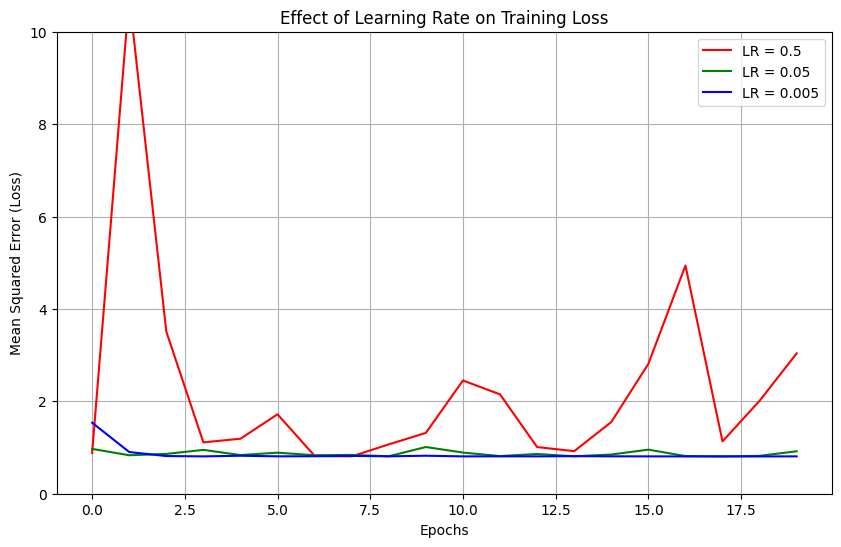

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 샘플 데이터 생성 (정답: y = 2x + 1)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# 2. 비교할 학습률 리스트
learning_rates = [0.5, 0.05, 0.005]
colors = ['red', 'green', 'blue']
n_epochs = 20

plt.figure(figsize=(10, 6))

# 3. 각 학습률에 대해 SGD 학습 반복
for lr, color in zip(learning_rates, colors):
    W = np.random.randn(1, 1)
    b = np.random.randn(1, 1)
    loss_history = []

    for epoch in range(n_epochs):
        # 매 Epoch마다 데이터 샘플 하나씩 학습
        for i in range(len(X)):
            random_index = np.random.randint(len(X))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            y_pred = xi.dot(W) + b
            error = y_pred - yi
            gradient_W = xi.T.dot(error)
            gradient_b = np.sum(error)

            W = W - lr * gradient_W
            b = b - lr * gradient_b

        # Epoch별 손실(loss) 계산 및 기록
        total_loss = np.mean((X.dot(W) + b - y)**2)
        loss_history.append(total_loss)

    # 4. 결과 시각화
    plt.plot(range(n_epochs), loss_history, color=color, label=f'LR = {lr}')

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Effect of Learning Rate on Training Loss")
plt.legend()
plt.grid(True)
plt.ylim(0, 10) # y축 범위를 고정하여 비교 용이하게 함
plt.show()

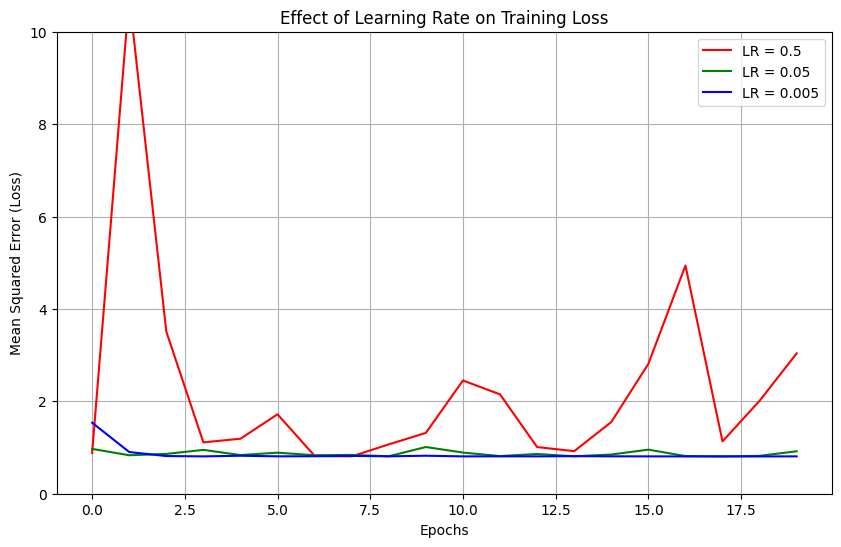

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 샘플 데이터 생성 (정답: y = 2x + 1)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# 2. 비교할 학습률 리스트
learning_rates = [0.5, 0.05, 0.005]
colors = ['red', 'green', 'blue']
n_epochs = 20

plt.figure(figsize=(10, 6))

# 3. 각 학습률에 대해 SGD 학습 반복
for lr, color in zip(learning_rates, colors):
    W = np.random.randn(1, 1)
    b = np.random.randn(1, 1)
    loss_history = []

    for epoch in range(n_epochs):
        # 매 Epoch마다 데이터 샘플 하나씩 학습
        for i in range(len(X)):
            random_index = np.random.randint(len(X))
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            y_pred = xi.dot(W) + b
            error = y_pred - yi
            gradient_W = xi.T.dot(error)
            gradient_b = np.sum(error)

            W = W - lr * gradient_W
            b = b - lr * gradient_b

        # Epoch별 손실(loss) 계산 및 기록
        total_loss = np.mean((X.dot(W) + b - y)**2)
        loss_history.append(total_loss)

    # 4. 결과 시각화
    plt.plot(range(n_epochs), loss_history, color=color, label=f'LR = {lr}')

plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("Effect of Learning Rate on Training Loss")
plt.legend()
plt.grid(True)
plt.ylim(0, 10) # y축 범위를 고정하여 비교 용이하게 함
plt.show()

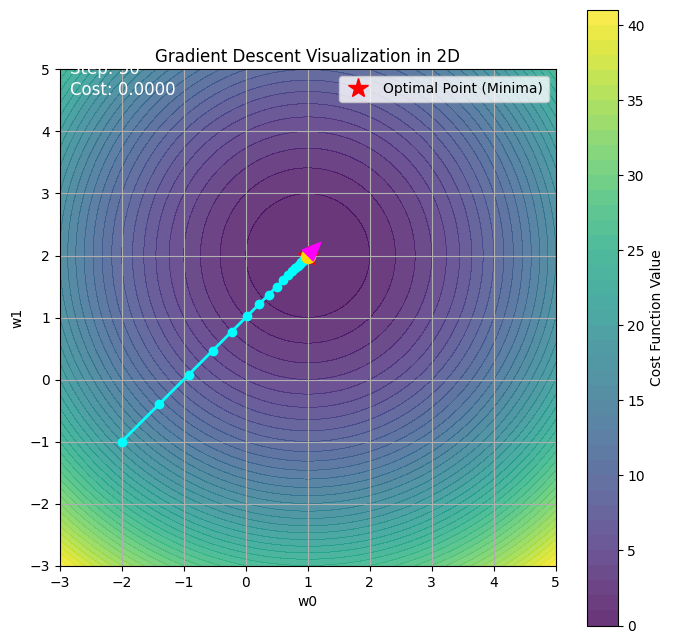

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.cm as cm
from matplotlib.patches import FancyArrow

# 1. 비용 함수 정의
def cost_function(w0, w1):
    return (w0 - 1)**2 + (w1 - 2)**2

# 2. 기울기 함수
def gradient(w0, w1):
    grad_w0 = 2 * (w0 - 1)
    grad_w1 = 2 * (w1 - 2)
    return np.array([grad_w0, grad_w1])

# 3. SGD 설정
learning_rate = 0.1
initial_w = np.array([-2.0, -1.0])
n_steps = 50

# 학습 과정 기록
history = [initial_w.copy()]
current_w = initial_w.copy()
for _ in range(n_steps):
    grad = gradient(current_w[0], current_w[1])
    current_w = current_w - learning_rate * grad
    history.append(current_w.copy())
history = np.array(history)

# 4. 시각화 준비
w0_range = np.linspace(-3, 5, 100)
w1_range = np.linspace(-3, 5, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
Z = cost_function(W0, W1)

fig, ax = plt.subplots(figsize=(8, 8))
contour = ax.contourf(W0, W1, Z, levels=50, cmap=cm.viridis, alpha=0.8)
fig.colorbar(contour, ax=ax, label='Cost Function Value')
ax.plot(1, 2, 'r*', markersize=15, label='Optimal Point (Minima)')

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_title('Gradient Descent Visualization in 2D')
ax.grid(True)
ax.set_aspect('equal', adjustable='box')
ax.legend()

# 애니메이션 초기 객체
path_line, = ax.plot([], [], 'o-', color='cyan', markersize=6, linewidth=2, label='GD Path')
current_point, = ax.plot([], [], 'o', color='gold', markersize=10, label='Current Point')
step_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, fontsize=12, color='white')

# 초기 화살표 (None으로 시작)
arrow_patch = None

# 5. 업데이트 함수
def update(frame):
    global arrow_patch
    # 이전 화살표 제거
    if arrow_patch:
        arrow_patch.remove()

    # 경로 업데이트
    path_line.set_data(history[:frame+1, 0], history[:frame+1, 1])
    current_point.set_data([history[frame, 0]], [history[frame, 1]])

    # 기울기 계산 및 화살표 갱신
    if frame > 0:
        current_w_val = history[frame-1]
        grad_val = gradient(current_w_val[0], current_w_val[1])
        arrow_dx = -learning_rate * grad_val[0] * 5
        arrow_dy = -learning_rate * grad_val[1] * 5
        arrow_patch = FancyArrow(
            current_w_val[0], current_w_val[1],
            arrow_dx, arrow_dy,
            width=0.05, head_width=0.25, head_length=0.3,
            color='magenta', zorder=5
        )
        ax.add_patch(arrow_patch)

    # 텍스트 업데이트
    step_text.set_text(f'Step: {frame}\nCost: {cost_function(history[frame,0], history[frame,1]):.4f}')

    return path_line, current_point, step_text

# 6. 애니메이션 생성
ani = FuncAnimation(fig, update, frames=len(history), blit=False, interval=80)

# GIF 저장
ani.save('gradient_descent_2d.gif', writer=PillowWriter(fps=10))
plt.show()